### Read the CSV file:
We will be importing the StudentData.csv file to analyze further. 


In [1]:
# read in the .csv file of student data

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
student_data = pd.read_csv("StudentData.csv")

In [2]:
print(student_data)

      ID_NUM  Gender  Resident  ACT_SCORE  ACT_RECEIVED  HS_GPA  Athlete  \
0          1       1         1       22.0             1    3.21        0   
1          2       1         1       22.0             1    3.66        1   
2          3       0         1        NaN             0    2.88        0   
3          4       1         1       30.0             1    3.73        1   
4          5       1         1        NaN             0    3.92        1   
...      ...     ...       ...        ...           ...     ...      ...   
5058    5059       0         1        NaN             0     NaN        0   
5059    5060       1         0        NaN             0     NaN        0   
5060    5061       1         0       17.0             1     NaN        0   
5061    5062       0         1       18.0             1     NaN        1   
5062    5063       1         0        NaN             0     NaN        0   

      Retained  
0            0  
1            1  
2            1  
3            1  
4 

In [3]:
student_data.columns

Index(['ID_NUM', 'Gender', 'Resident', 'ACT_SCORE', 'ACT_RECEIVED', 'HS_GPA',
       'Athlete', 'Retained'],
      dtype='object')

In [4]:
student_data.describe()

,ID_NUM,Gender,Resident,ACT_SCORE,ACT_RECEIVED,HS_GPA,Athlete,Retained
count,5063.000000,5063.000000,5063.000000,4189.000000,5063.000000,3997.000000,5063.000000,5063.000000
mean,2532.000000,0.458424,0.950622,23.889472,0.827375,2.978556,0.426230,0.639542
std,1461.706537,0.498318,0.216677,4.022140,0.377960,1.287854,0.494577,0.480181
min,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,1266.500000,0.000000,1.000000,21.000000,1.000000,2.840000,0.000000,0.000000
50%,2532.000000,0.000000,1.000000,24.000000,1.000000,3.410000,0.000000,1.000000
75%,3797.500000,1.000000,1.000000,27.000000,1.000000,3.800000,1.000000,1.000000
max,5063.000000,1.000000,1.000000,35.000000,1.000000,5.140000,1.000000,1.000000


In [5]:
# remove duplicates

student_data.drop_duplicates(inplace = True)

print(student_data)

      ID_NUM  Gender  Resident  ACT_SCORE  ACT_RECEIVED  HS_GPA  Athlete  \
0          1       1         1       22.0             1    3.21        0   
1          2       1         1       22.0             1    3.66        1   
2          3       0         1        NaN             0    2.88        0   
3          4       1         1       30.0             1    3.73        1   
4          5       1         1        NaN             0    3.92        1   
...      ...     ...       ...        ...           ...     ...      ...   
5058    5059       0         1        NaN             0     NaN        0   
5059    5060       1         0        NaN             0     NaN        0   
5060    5061       1         0       17.0             1     NaN        0   
5061    5062       0         1       18.0             1     NaN        1   
5062    5063       1         0        NaN             0     NaN        0   

      Retained  
0            0  
1            1  
2            1  
3            1  
4 

In [6]:
#check for null values and the percent that are null in each column

student_data.isnull()

,ID_NUM,Gender,Resident,ACT_SCORE,ACT_RECEIVED,HS_GPA,Athlete,Retained
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
5058,False,False,False,True,False,True,False,False
5059,False,False,False,True,False,True,False,False
5060,False,False,False,False,False,True,False,False
5061,False,False,False,False,False,True,False,False


In [7]:
student_data.isnull().any()

ID_NUM          False
Gender          False
Resident        False
ACT_SCORE        True
ACT_RECEIVED    False
HS_GPA           True
Athlete         False
Retained        False
dtype: bool

In [8]:
student_data.isnull().sum()/student_data.shape[0]

ID_NUM          0.000000
Gender          0.000000
Resident        0.000000
ACT_SCORE       0.172625
ACT_RECEIVED    0.000000
HS_GPA          0.210547
Athlete         0.000000
Retained        0.000000
dtype: float64

In [9]:
#See what the average is for ACT Scores and High school GPAs that will be used to replace the Null values
print ("ACT Score Average is:", student_data.ACT_SCORE.mean())
print ("High School GPA Average is:", student_data.HS_GPA.mean())


ACT Score Average is: 23.889472427787062
High School GPA Average is: 2.978555666750063


In [10]:
#Find any null values in the ACT Score column and the HS GPA Column and replace with the average

student_data.ACT_SCORE.fillna(student_data.ACT_SCORE.mean(),inplace = True)
student_data.HS_GPA.fillna(student_data.HS_GPA.mean(),inplace = True)

In [11]:
#New data frame with the null values filled in by average for ACT and HS GPA
print(student_data)

      ID_NUM  Gender  Resident  ACT_SCORE  ACT_RECEIVED    HS_GPA  Athlete  \
0          1       1         1  22.000000             1  3.210000        0   
1          2       1         1  22.000000             1  3.660000        1   
2          3       0         1  23.889472             0  2.880000        0   
3          4       1         1  30.000000             1  3.730000        1   
4          5       1         1  23.889472             0  3.920000        1   
...      ...     ...       ...        ...           ...       ...      ...   
5058    5059       0         1  23.889472             0  2.978556        0   
5059    5060       1         0  23.889472             0  2.978556        0   
5060    5061       1         0  17.000000             1  2.978556        0   
5061    5062       0         1  18.000000             1  2.978556        1   
5062    5063       1         0  23.889472             0  2.978556        0   

      Retained  
0            0  
1            1  
2           

In [12]:
#After initial inspection of box plots, can see values of 0 that may have been mis entered. Treating them like nulls and replacing 0 values with the average of the column

mean = student_data['HS_GPA'].mean()
student_data.loc[student_data['HS_GPA'] == 0, 'HS_GPA'] = mean

In [13]:
student_data.ACT_SCORE.head()

0    22.000000
1    22.000000
2    23.889472
3    30.000000
4    23.889472
Name: ACT_SCORE, dtype: float64

In [14]:
student_data.HS_GPA.head()

0    3.21
1    3.66
2    2.88
3    3.73
4    3.92
Name: HS_GPA, dtype: float64

In [15]:
student_data.Resident.head()

0    1
1    1
2    1
3    1
4    1
Name: Resident, dtype: int64

<AxesSubplot:>

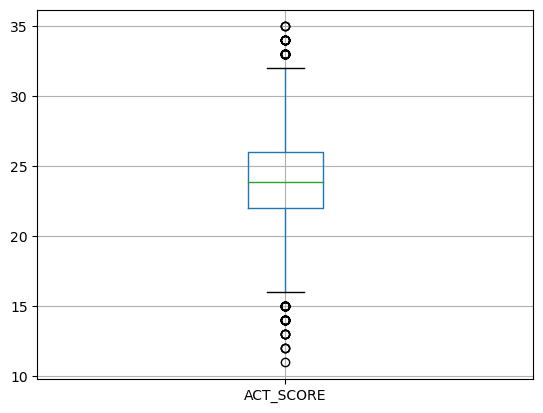

In [16]:
student_data.boxplot('ACT_SCORE')

array([[<AxesSubplot:title={'center':'ACT_SCORE'}>]], dtype=object)

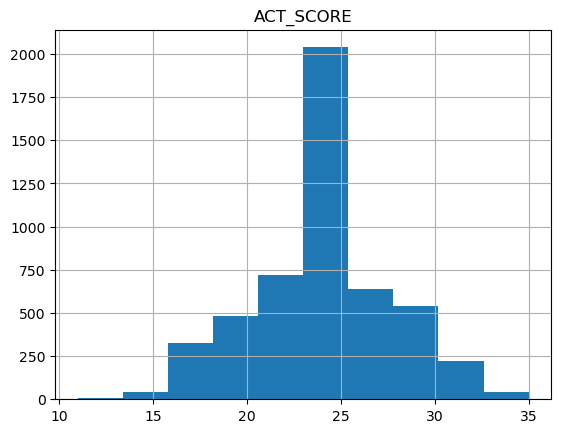

In [17]:
student_data.hist('ACT_SCORE')

<AxesSubplot:>

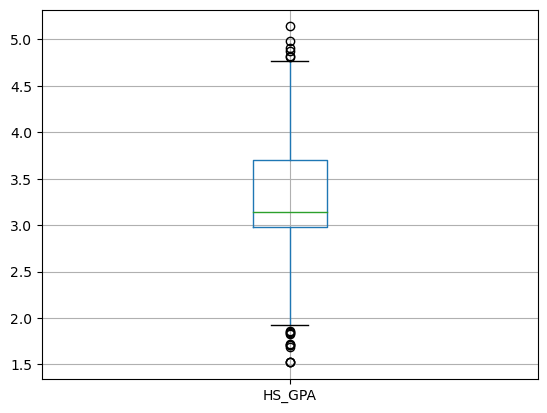

In [18]:
student_data.boxplot('HS_GPA')

array([[<AxesSubplot:title={'center':'HS_GPA'}>]], dtype=object)

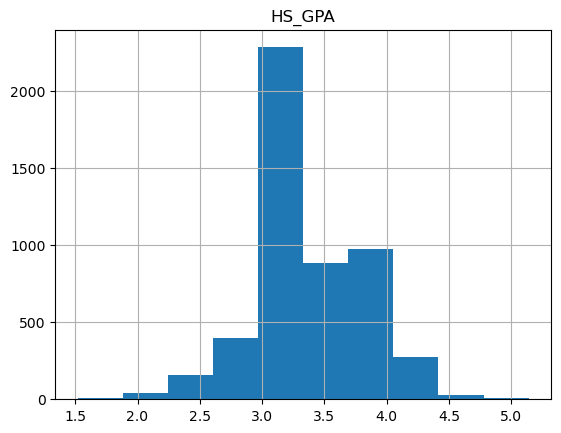

In [19]:
student_data.hist('HS_GPA')

In [20]:
student_data[['ACT_SCORE', 'HS_GPA','Gender','Resident','Athlete','Retained']].corr()

,ACT_SCORE,HS_GPA,Gender,Resident,Athlete,Retained
ACT_SCORE,1.000000,0.472962,0.051939,0.106525,-0.142253,0.182637
HS_GPA,0.472962,1.000000,0.202624,0.083394,-0.017869,0.219257
Gender,0.051939,0.202624,1.000000,-0.008039,-0.209431,0.064911
Resident,0.106525,0.083394,-0.008039,1.000000,0.052644,0.109908
Athlete,-0.142253,-0.017869,-0.209431,0.052644,1.000000,0.059783
Retained,0.182637,0.219257,0.064911,0.109908,0.059783,1.000000


In [21]:
student_data[['ACT_RECEIVED', 'HS_GPA','Gender','Resident','Athlete','Retained']].corr()

,ACT_RECEIVED,HS_GPA,Gender,Resident,Athlete,Retained
ACT_RECEIVED,1.000000,0.290736,0.019575,0.006860,0.179156,-0.009841
HS_GPA,0.290736,1.000000,0.202624,0.083394,-0.017869,0.219257
Gender,0.019575,0.202624,1.000000,-0.008039,-0.209431,0.064911
Resident,0.006860,0.083394,-0.008039,1.000000,0.052644,0.109908
Athlete,0.179156,-0.017869,-0.209431,0.052644,1.000000,0.059783
Retained,-0.009841,0.219257,0.064911,0.109908,0.059783,1.000000


<AxesSubplot:>

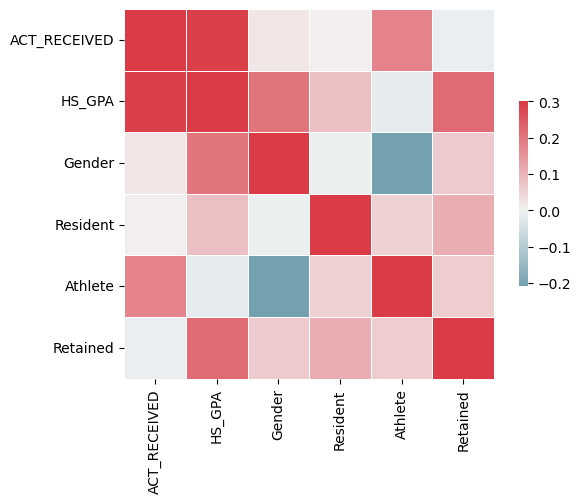

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(student_data[['ACT_RECEIVED', 'HS_GPA','Gender','Resident','Athlete','Retained']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidth=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

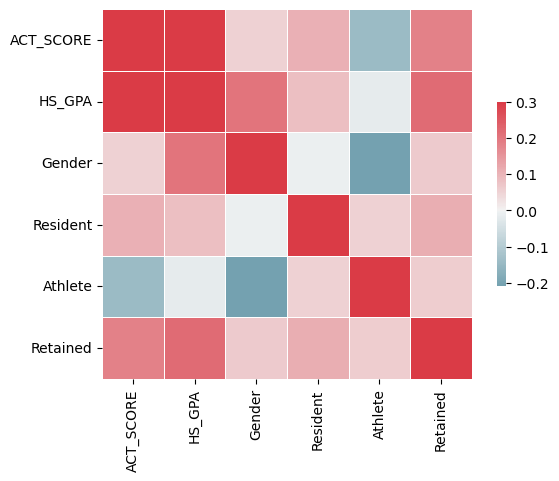

In [23]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(student_data[['ACT_SCORE', 'HS_GPA','Gender','Resident','Athlete','Retained']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidth=.5, cbar_kws={"shrink": .5})

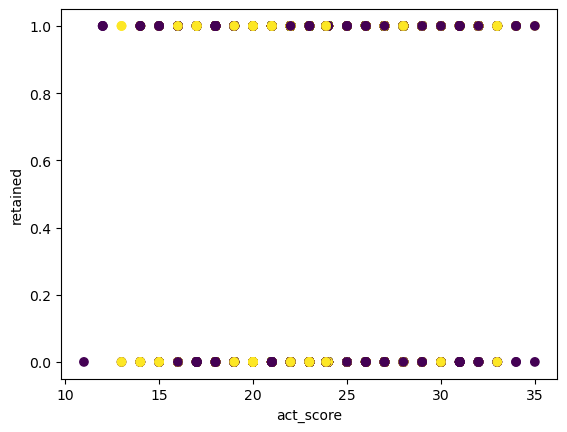

In [24]:
retain = student_data['Retained']
act_score = student_data['ACT_SCORE']
#plt.scatter(height, weight)
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

gender = student_data['Gender']
plt.scatter(act_score, retain, c=gender)
plt.xlabel('act_score')
plt.ylabel('retained')
plt.show()

#age = howell_full['age']
#plt.scatter(age, height, c=gender)
#plt.xlabel('age (years)')
#plt.ylabel('height (cm)')
#plt.show()

In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(student_data,
                                       test_size=0.2,random_state=123)

print('Train size:', len(train_set), 'Test size:', len(test_set))

Train size: 4050 Test size: 1013


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['ACT_SCORE', 'HS_GPA', 'Gender', 'Resident','Athlete']]
y = train_set['Retained']
X_test = test_set[['ACT_SCORE', 'HS_GPA', 'Gender','Resident','Athlete']]
y_test = test_set['Retained']

lr_model = LinearRegression()
lr_model.fit(X,y)

###Predictoin of the model with training data

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

### Getting the performance of model on the test data

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -0.4095416424874442
 Coefficients [0.01361052 0.15729609 0.03985073 0.16511703 0.08239223]
 Score 0.06899274398522293
MAE is  0.42578969531126254
RMSE is  0.4613669346522417
MSE is  0.21285944839040585
R^2  0.06899274398522293

Results for linear regression on test data
MAE is  0.4338361915320512
RMSE is  0.46917166925379195
MSE is  0.22012205523038955
R^2  0.07209229150763419


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y = train_set['Retained']

X_test = test_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y_test = test_set['Retained']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for decision tree on training data
  Default settings
Confusion Matrix
[[1109  324]
 [ 181 2436]]
Accuracy is   0.8753086419753087
Precision is  0.874499411218881
Recall is     0.8753086419753087
F1 is         0.8736925888352375

Results for decision tree on test data
  Default settings
Confusion Matrix
[[147 245]
 [193 428]]
Accuracy is   0.5676209279368213
Precision is  0.557169315289662
Recall is     0.5676209279368213
F1 is         0.5609508797520644


In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y = train_set['Retained']

X_test = test_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y_test = test_set['Retained']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for NN on train data
  Default settings
Confusion Matrix
[[ 278 1155]
 [ 193 2424]]
Accuracy is   0.6671604938271605
Precision is  0.646483286744518
Recall is     0.6671604938271605
F1 is         0.6089151376305011

Results for NN on test data
  Default settings
Confusion Matrix
[[ 78 314]
 [ 54 567]]
Accuracy is   0.6367226061204343
Precision is  0.623202158952501
Recall is     0.6367226061204343
F1 is         0.5780386530987026


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  
X = train_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y = train_set['Retained']

X_test = test_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y_test = test_set['Retained']

rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(X,y)

y_pred = rf_model.predict(X)

print('Results for Random Forest on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test)
print('Results for Random Forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for Random Forest on train data
  Default settings
Confusion Matrix
[[1041  392]
 [ 113 2504]]
Accuracy is   0.8753086419753087
Precision is  0.877887761976415
Recall is     0.8753086419753087
F1 is         0.8717400206770998

Results for Random Forest on test data
  Default settings
Confusion Matrix
[[137 255]
 [162 459]]
Accuracy is   0.5883514313919053
Precision is  0.5713981498993731
Recall is     0.5883514313919053
F1 is         0.5749883652872662


In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  
X = train_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y = train_set['Retained']

X_test = test_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y_test = test_set['Retained']

ada_model = AdaBoostClassifier(n_estimators=150)
ada_model.fit(X,y)

y_pred = ada_model.predict(X)

print('Results for ADA on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = ada_model.predict(X_test)
print('Results for ADA on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for ADA on train data
  Default settings
Confusion Matrix
[[ 372 1061]
 [ 230 2387]]
Accuracy is   0.6812345679012346
Precision is  0.6659800376581705
Recall is     0.6812345679012346
F1 is         0.6379879574295622

Results for ADA on test data
  Default settings
Confusion Matrix
[[ 94 298]
 [ 54 567]]
Accuracy is   0.6525172754195459
Precision is  0.6476141052121515
Recall is     0.6525172754195459
F1 is         0.602540110510918


In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Build the classifiers
vc1_dt = DecisionTreeClassifier()
vc2_svm = SVC()
vc3_nn = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                       solver='lbfgs')

# Bundle into a list with names
vcList = [('DT',vc1_dt),
          ('SVM',vc2_svm),
          ('NN',vc3_nn)]
  
X = train_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y = train_set['Retained']

X_test = test_set[['ACT_SCORE','HS_GPA','Gender', 'Resident','Athlete']]
y_test = test_set['Retained']

#ada_model = AdaBoostClassifier(n_estimators=150)
vote_model = VotingClassifier(vcList)
vote_model.fit(X,y)

y_pred = vote_model.predict(X)

print('Results for Voting Ensemble on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = vote_model.predict(X_test)
print('Results for Voting Ensemble on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for Voting Ensemble on training data
  Default settings
Confusion Matrix
[[ 267 1166]
 [  45 2572]]
Accuracy is   0.7009876543209876
Precision is  0.7474055642189225
Recall is     0.7009876543209876
F1 is         0.6313162320884897

Results for Voting Ensemble on test data
  Default settings
Confusion Matrix
[[ 45 347]
 [ 31 590]]
Accuracy is   0.6268509378084897
Precision is  0.6151330795485238
Recall is     0.6268509378084897
F1 is         0.5387150805695602


In [32]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Retained   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     59.94
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           2.09e-60
Time:                        19:21:58   Log-Likelihood:                -2613.8
No. Observations:                4050   AIC:                             5240.
Df Residuals:                    4044   BIC:                             5277.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4095      0.063     -6.467      0.000      -0.534      -0.285
ACT_SCORE      0.0136      0.002      5.947      0.000       0.009       0.018
HS_GPA         0.1573      0.018      8.920      0.000       0.123       0.192
Gender         0.0399      0.015      2.600      0.009       0.010       0.070
Resident       0.1651      0.034      4.919      0.000       0.099       0.231
Athlete        0.0824      0.015      5.385      0.000       0.052       0.112
==============================================================================
Omnibus:                    35577.250   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.998
Skew:                          -0.547   Prob(JB):                    2.03e-118
Kurtosis:                       1.581   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

lm = LinearRegression()
lm.fit(X, y)

cross_val_score(lm, X, y, scoring = 'neg_mean_absolute_error')

array([-0.4403081 , -0.41704872, -0.4248961 , -0.43043699, -0.42044778])

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Separate features and target variable
X = student_data[['ACT_SCORE', 'HS_GPA', 'Gender', 'Athlete', 'Resident']]
y = student_data['Retained']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.667324777887463


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['ACT_SCORE', 'HS_GPA', 'Gender', 'Athlete', 'Resident']]
y = train_set['Retained']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['ACT_SCORE', 'HS_GPA', 'Gender', 'Athlete', 'Resident']]
y_test = test_set['Retained']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

###Predictoin of the model with training data

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

### Getting the performance of model on the test data

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  -47.516914204696086
 Coefficients [ 3.24187838 14.44525256 10.01299073 ...  2.00354241  2.00354241
  8.13078315]
 Score 0.12459233243806067
MAE is  0.4021966435223431
RMSE is  0.4473784972803133
MSE is  0.2001475198287913
R^2  0.12459233243806067

Results for linear regression on test data
MAE is  0.9912118167452427
RMSE is  10.939541033469997
MSE is  119.67355802297382
R^2  -503.4747418699144


In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['ACT_SCORE', 'HS_GPA', 'Gender', 'Athlete', 'Resident']]
y = train_set['Retained']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['ACT_SCORE', 'HS_GPA', 'Gender', 'Athlete', 'Resident']]
y_test = test_set['Retained']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

###Predictoin of the model with training data

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

### Getting the performance of model on the test data

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  0.27577583626200364
 Coefficients [-0.  0. -0. ... -0. -0.  0.]
 Score 0.08086268244806338
MAE is  0.42147688784453535
RMSE is  0.4584163858361767
MSE is  0.21014558280310244
R^2  0.08086268244806338

Results for elastic net on test data
MAE is  0.43117760544479916
RMSE is  0.4689235297191503
MSE is  0.21988927672426684
R^2  0.07307355151802497


C:\Users\rp150\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.260e+02, tolerance: 9.260e-02
  model = cd_fast.enet_coordinate_descent(


In [62]:
#check how important each feature was in this model
importance = student_data({'Importance': rf.feature_importances_}, index=X.columns)
importance.sort_values('Importance', ascending=False)

NameError: name 'rf' is not defined